<a href="https://colab.research.google.com/github/HwangHanJae/Dacon_tutorial/blob/main/Dacon_moives_boxnum_prediction_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#한글화

In [1]:
#나눔 고딕 폰트 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 라이브러리 로드

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from IPython.display import set_matplotlib_formats

warnings.filterwarnings(action='ignore')
plt.style.use('seaborn')
set_matplotlib_formats('svg')



In [3]:
#맷플롯립 폰트 관련 매니저
import matplotlib.font_manager as fm
# 맷플롯라이브러리에 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()
# 진행후에 런타임 다시시작
print("현재 설정 폰트",plt.rcParams['font.family'])

현재 설정 폰트 ['NanumBarunGothic']


# 데이터 불러오기

In [4]:
path  = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/movies/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

#EDA(탐색적 자료 분석)

In [8]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [9]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [12]:
train.shape

(600, 12)

In [13]:
test.shape

(243, 11)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [20]:
# e+ 포맷 변경하기
pd.options.display.float_format = "{:.1f}".format

In [21]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [31]:
train[['genre','box_off_num']].groupby("genre").mean().sort_values(by='box_off_num', ascending=False)

,box_off_num
genre,
느와르,2263695.1
액션,2203974.1
SF,1788345.7
코미디,1193914.0
드라마,625689.8
공포,590832.5
미스터리,527548.2
멜로/로맨스,425968.0
애니메이션,181926.7


In [33]:
pd.reset_option("display.float_format")

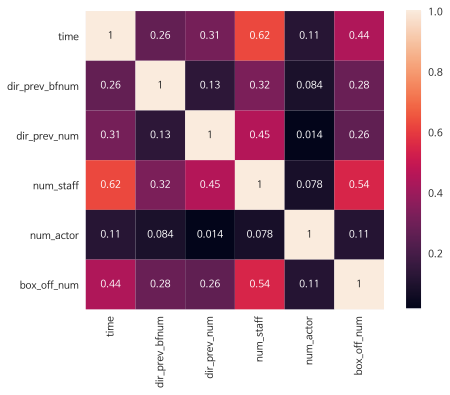

In [36]:
sns.heatmap(train.corr(), annot=True, square=True)

#데이터 전처리

In [39]:
#결측치 퍼센트로 확인
train.isnull().sum() / train.shape[0]

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [44]:
train.loc[train['dir_prev_bfnum'].isnull()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [52]:
train['dir_prev_bfnum'] = train['dir_prev_bfnum'].fillna(0)
test['dir_prev_bfnum'] = test['dir_prev_bfnum'].fillna(0)

In [53]:
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [54]:
test.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

# 변수 선택 및 모델 구축

In [57]:
features = ['time', "dir_prev_num",'num_staff',"num_actor"]
target = ['box_off_num']

In [58]:
X_train, X_test, y_train = train[features], test[features], train[target]
X_train.shape, X_test.shape, y_train.shape

((600, 4), (243, 4), (600, 1))

# 모델 학습 및 검증

1. lightBGM(base model)
2. k-fold lightGBM(k-fold model)
3. feature engineering
4. grid search(hyperparameter tuning)

## LightGBM

In [59]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(random_state=42, n_esimators= 1000)

In [65]:
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_esimators=1000, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [62]:
submission = pd.read_csv(path + "submission.csv")
singleLGBM = submission.copy()

In [63]:
singleLGBM.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [66]:
singleLGBM['box_off_num'] = model.predict(X_test)
singleLGBM.head()

,title,box_off_num
0,용서는 없다,3.760144e+06
1,아빠가 여자를 좋아해,7.579988e+05
2,하모니,-1.091700e+04
3,의형제,1.490854e+06
4,평행 이론,8.458000e+05


In [67]:
singleLGBM.to_csv('singleLGBM.csv', index=False)

## 교차검증(k-fold)

- 과대적합 방지
- 모델 간 일반적인 성능 비교

In [69]:
from sklearn.model_selection import KFold

In [70]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [71]:
model = LGBMRegressor(random_state=42, n_estimators=1000)

In [72]:
models = []

In [76]:
for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose=100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.37794e+12
Early stopping, best iteration is:
[7]	valid_0's l2: 1.24852e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.37353e+12
Early stopping, best iteration is:
[13]	valid_0's l2: 1.19321e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.76187e+12
Early stopping, best iteration is:
[18]	valid_0's l2: 2.37215e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.67389e+12
Early stopping, best iteration is:
[96]	valid_0's l2: 2.64334e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.39842e+12
Early stopping, best iteration is:
[25]	valid_0's l2: 3.2135e+12


In [77]:
preds = []
for model in models:
  preds.append(model.predict(X_test))
  
print(len(preds))

5


In [89]:
submission = pd.read_csv(path + "submission.csv")
kfold_submission = submission.copy()
kfold_submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [91]:
kfold_submission['box_off_num'] = np.mean(preds, axis=0)
kfold_submission.head()

,title,box_off_num
0,용서는 없다,3.193546e+06
1,아빠가 여자를 좋아해,7.890194e+05
2,하모니,8.253034e+05
3,의형제,1.924920e+06
4,평행 이론,9.656126e+05


In [ ]:
kfold_submission.to_csv("kfold_submission.csv", index=False)

## feature engineering

In [93]:
features

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [94]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['genre'] = le.fit_transform(train['genre'])
test['genre'] = le.transform(test['genre'])

In [98]:
features = ['time', "dir_prev_num",'num_staff',"num_actor", "dir_prev_bfnum","genre"]
target = ['box_off_num']

X_train, X_test, y_train = train[features], test[features], train[target]
X_train.shape, X_test.shape, y_train.shape

((600, 6), (243, 6), (600, 1))

In [99]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
model = LGBMRegressor(random_state=42, n_estimators=1000)
models = []

for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose=100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.11116e+12
Early stopping, best iteration is:
[7]	valid_0's l2: 1.24145e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.04315e+12
Early stopping, best iteration is:
[80]	valid_0's l2: 9.95514e+11
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.57987e+12
Early stopping, best iteration is:
[20]	valid_0's l2: 2.35713e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.80131e+12
[200]	valid_0's l2: 2.86524e+12
Early stopping, best iteration is:
[111]	valid_0's l2: 2.77418e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.29601e+12
Early stopping, best iteration is:
[37]	valid_0's l2: 3.11588e+12


In [100]:
preds = []
for model in models:
  preds.append(model.predict(X_test))
  
print(len(preds))

submission = pd.read_csv(path + "submission.csv")
kfold_submission_fe = submission.copy()
kfold_submission_fe.head()

5


,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [101]:
kfold_submission_fe['box_off_num'] = np.mean(preds, axis=0)
kfold_submission_fe.head()

,title,box_off_num
0,용서는 없다,2.533810e+06
1,아빠가 여자를 좋아해,7.887681e+05
2,하모니,8.002678e+05
3,의형제,1.967902e+06
4,평행 이론,1.033341e+06


In [103]:
kfold_submission_fe.to_csv("kfold_submission_fe.csv", index=False)

##튜닝

In [116]:
from sklearn.metrics import mean_squared_error, make_scorer

In [117]:
def rmse(y_true, y_pred):
  result = np.sqrt(mean_squared_error(y_true, y_pred))
  return result

In [118]:
from sklearn.model_selection import GridSearchCV

model = LGBMRegressor(random_state = 42, n_estimators=1000)

params ={
    "learning_rate" : [0.1, 0.01, 0.003],
    "min_child_samples" : [20,30]
}

gs = GridSearchCV(estimator=model,
                  param_grid = params,
                  scoring = make_scorer(rmse, greater_is_better=False),
                  cv = k_fold)

In [119]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=1000, n_jobs=-1,
                                     num_leaves=31, objective=None,
                                     random_state=42, reg_alpha=0.0,
                                     reg_lambda=0.0, silent=True, subsample=1.0,
                                     subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                      

In [120]:
gs.best_params_

{'learning_rate': 0.003, 'min_child_samples': 20}

In [121]:
model = gs.best_estimator_

models =[]

for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose=100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.37581e+12
[200]	valid_0's l2: 1.25159e+12
[300]	valid_0's l2: 1.25625e+12
Early stopping, best iteration is:
[227]	valid_0's l2: 1.24269e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.51413e+12
[200]	valid_0's l2: 1.3137e+12
[300]	valid_0's l2: 1.2253e+12
[400]	valid_0's l2: 1.16048e+12
[500]	valid_0's l2: 1.1264e+12
[600]	valid_0's l2: 1.09866e+12
[700]	valid_0's l2: 1.08304e+12
[800]	valid_0's l2: 1.07435e+12
[900]	valid_0's l2: 1.06756e+12
[1000]	valid_0's l2: 1.06478e+12
Did not meet early stopping. Best iteration is:
[998]	valid_0's l2: 1.06478e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.18145e+12
[200]	valid_0's l2: 2.79493e+12
[300]	valid_0's l2: 2.55879e+12
[400]	valid_0's l2: 2.46127e+12
[500]	valid_0's l2: 2.40899e+12
[600]	valid_0's l2: 2.37023e+12
[700]	valid_0's l2: 2.36598e+12
Early stopping, best itera

In [122]:
preds = []
for model in models:
  preds.append(model.predict(X_test))
  
print(len(preds))

5


In [123]:
submission = pd.read_csv(path + "submission.csv")
gs_tuning_submission_2 = submission.copy()
gs_tuning_submission_2.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [124]:
gs_tuning_submission_2['box_off_num'] = np.mean(preds, axis=0)
gs_tuning_submission_2.head()

,title,box_off_num
0,용서는 없다,2.411673e+06
1,아빠가 여자를 좋아해,6.759119e+05
2,하모니,7.852997e+05
3,의형제,1.955722e+06
4,평행 이론,1.020007e+06


In [125]:
gs_tuning_submission_2.to_csv('gs_tuning_submission2.csv', index=False)

# 제출

In [60]:
submission = pd.read_csv(path + "submission.csv")
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
submission['box_off_num'] = pred
submission.head()

,title,box_off_num
0,용서는 없다,2.547522e+06
1,아빠가 여자를 좋아해,9.604168e+05
2,하모니,1.376409e+06
3,의형제,1.270179e+06
4,평행 이론,1.067707e+06


In [ ]:
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/movies/"
sub_name = "rf_submission1.csv"
submission.to_csv(sub_path + sub_name, index=False)